In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Настройка стилей графиков
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14


# Expert level

## Определения устойчивости

Рассмотрим последовательность, заданную рекуррентным соотношением $x_{n+1} = f(x_n)$. Пусть $x^*$ — неподвижная точка отображения, то есть $x^* = f(x^*)$.

**Определение 1:** Неподвижная точка $x^*$ называется **устойчивой по Ляпунову**, если для любого $\varepsilon > 0$ существует такое $\delta > 0$, что для любого начального значения $x_0$, удовлетворяющего условию $|x_0 - x^*| < \delta$, выполняется неравенство:
$$|x_n - x^*| < \varepsilon \quad \text{для всех } n \ge 0$$

**Определение 2:** Неподвижная точка $x^*$ называется **асимптотически устойчивой**, если она устойчива по Ляпунову и существует такое $\delta_0 > 0$, что для любого $x_0$, удовлетворяющего условию $|x_0 - x^*| < \delta_0$, выполняется предельное соотношение:
$$\lim_{n \to \infty} x_n = x^*$$


## 1. Связь асимптотической устойчивости и сходимости

**Вопрос:** Следует ли асимптотическая устойчивость $x^*$ из условия сходимости $\exists \delta_0 > 0 : |x_0 - x^*| < \delta_0 \implies x_n \to x^*$?

**Ответ:** Нет, не следует.

Условие сходимости (существование области притяжения) гарантирует только свойство **аттрактивности**. Однако определение асимптотической устойчивости требует выполнения двух условий:
1.  Устойчивость по Ляпунову (траектория не должна покидать $\varepsilon$-окрестность).
2.  Аттрактивность (траектория должна стремиться к $x^*$).

### Пример Винограда (Vinograd's example)
Классическим контрпримером является **пример Винограда (R.E. Vinograd, 1957)**.
Он рассматривал систему дифференциальных уравнений (или дискретную систему), имеющую особую точку (состояние равновесия), которая является глобальным аттрактором (все траектории стремятся к ней при $t \to \infty$), но **не является устойчивой по Ляпунову**.

В таких системах ("неустойчивые аттракторы" или "седловые сектора" в точке 0) траектории, начинающиеся сколь угодно близко к равновесию, сначала совершают большой "выброс" (уходят далеко от точки), и лишь затем возвращаются и асимптотически приближаются к ней. Тот факт, что траектория покидает малую $\varepsilon$-окрестность, нарушает условие устойчивости, несмотря на итоговую сходимость.


## 2. Исследование устойчивости неподвижной точки $x^*=0$ при $r \in (0; 1)$

**Утверждение:** При $r \in (0; 1)$ неподвижная точка $x^*=0$ является устойчивой и асимптотически устойчивой.

### Теоретическая справка: Почему работает критерий $|f'(x^*)| < 1$?

Суть метода устойчивости по первому приближению заключается в **линеаризации** нелинейного отображения в малой окрестности неподвижной точки. График функции $f(x)$ заменяется касательной.

Пусть $x^*$ — неподвижная точка, то есть $f(x^*) = x^*$.
Рассмотрим малoе отклонение $\delta_n = x_n - x^*$.
Тогда следующее состояние: $x_{n+1} = x^* + \delta_{n+1}$.

Разложим функцию $f(x)$ в ряд Тейлора в окрестности точки $x^*$:
$$x_{n+1} = f(x_n) = f(x^* + \delta_n) \approx f(x^*) + f'(x^*) \cdot \delta_n + O(\delta_n^2)$$

Так как $f(x^*) = x^*$, а членами $O(\delta_n^2)$ при малых отклонениях можно пренебречь, получаем приближенное линейное уравнение для эволюции ошибки:
$$x^* + \delta_{n+1} \approx x^* + f'(x^*) \cdot \delta_n \implies \delta_{n+1} \approx f'(x^*) \cdot \delta_n$$

Обозначим мультипликатор $\lambda = f'(x^*)$. Динамика малого отклонения описывается геометрической прогрессией:
$$\delta_n \approx \lambda^n \cdot \delta_0$$

1.  Если **$|\lambda| < 1$**, то $\lambda^n \to 0$, отклонение затухает $\to$ точка **асимптотически устойчива**.
2.  Если **$|\lambda| > 1$**, то $|\lambda^n| \to \infty$, отклонение растет $\to$ точка **неустойчива**.

---

### Способ 1: Без использования производной (через неравенства)
Рассмотрим поведение траектории $x_{n+1} = r x_n (1 - x_n)$.
Так как $x_0 \in (0, 1)$, то и все последующие $x_n \in (0, 1)$ (см. доказательство в Easy level).
Следовательно, множитель $(1 - x_n) < 1$.
Тогда справедлива оценка:
$$x_{n+1} = r x_n (1 - x_n) < r x_n$$
Так как $r < 1$, последовательность $x_n$ ограничена снизу нулем и монотонно убывает:
$$x_{n+1} < r x_n < r^2 x_{n-1} < \dots < r^{n+1} x_0$$
Поскольку $r^n \to 0$ при $n \to \infty$, то $x_n \to 0$. Сходимость доказана.

**Устойчивость:** Для любого $\varepsilon > 0$ выберем $\delta = \varepsilon$. Если $x_0 < \delta$, то, в силу убывания последовательности, $x_n < x_0 < \delta = \varepsilon$ для всех $n$. Условие Ляпунова выполнено.

### Способ 2: Через производную (по первому приближению)
Рассмотрим функцию $f(x) = rx(1-x)$.
Производная: $f'(x) = r(1-2x)$.
В точке $x^*=0$: $f'(0) = r$.

При $r \in (0; 1)$, имеем $|f'(0)| = r < 1$.
Так как модуль производной меньше единицы, малые отклонения будут затухать как геометрическая прогрессия со знаменателем $r$.
Следовательно, точка $x^*=0$ является **асимптотически устойчивой**.


## 3. Исследование неустойчивости точки $x^*=0$ при $r \in (2; 3)$

**Утверждение:** При $r \in (2; 3)$ неподвижная точка $x^*=0$ является неустойчивой.

### Способ 1: Без использования производной
В этом диапазоне существует вторая неподвижная точка $x_2^* = 1 - \frac{1}{r}$, которая лежит в интервале $(0, 1)$, так как $r > 1$.
Рассмотрим малую окрестность нуля $(0, \delta)$, где $\delta = x_2^* = 1 - \frac{1}{r}$.
Пусть начальная точка $x_0$ лежит в этой окрестности: $0 < x_0 < 1 - \frac{1}{r}$.
Это неравенство эквивалентно:
$$x_0 < \frac{r-1}{r} \implies r x_0 < r - 1 \implies 1 + r x_0 < r \implies 1 - x_0 > 1 - \frac{r-1}{r} = \frac{1}{r}$$
То есть, если $x_n$ близко к 0, то $(1-x_n) > \frac{1}{r}$.
Тогда:
$$x_{n+1} = r x_n (1 - x_n) > r x_n \cdot \frac{1}{r} = x_n$$
Получаем $x_{n+1} > x_n$. Траектория **удаляется** от точки $x^*=0$.
Следовательно, любое малое отклонение будет нарастать, и точка является неустойчивой.

### Способ 2: Через производную
При $r \in (2; 3)$, значение производной в нуле: $f'(0) = r$.
Так как $r > 2$, то $|f'(0)| > 1$.
Малое отклонение $\delta$ на следующем шаге превратится в $\approx r \cdot \delta$, что больше исходного.
Согласно теореме Ляпунова (устойчивость по первому приближению), если модуль производной в неподвижной точке больше 1, то эта точка **неустойчива**.


## 4. Чувствительность к начальным условиям (Эффект бабочки)

Одним из ключевых свойств хаотических систем является экспоненциальная чувствительность к малым изменениям начальных условий.


<unknown>:15: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<ipython-input-3-1e0abfe55a93>:15: SyntaxWarning: invalid escape sequence '\e'
  plt.title(f"Чувствительность к начальным условиям при $r={r}$ ($\epsilon = 10^{{-6}}$)")


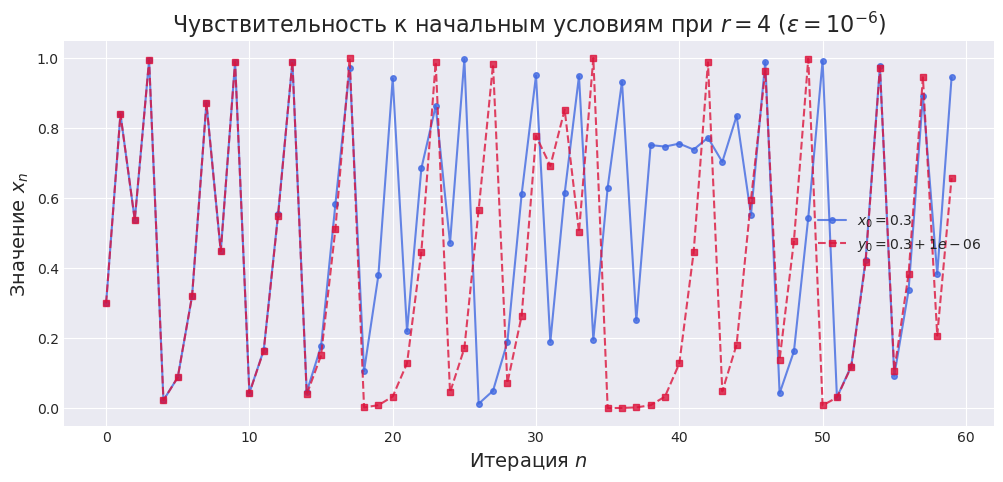

In [3]:
def plot_sensitivity(r, x0, epsilon, n=50):
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = x0
    y[0] = x0 + epsilon
    
    for i in range(1, n):
        x[i] = r * x[i-1] * (1 - x[i-1])
        y[i] = r * y[i-1] * (1 - y[i-1])
        
    plt.figure(figsize=(12, 5))
    plt.plot(x, 'o-', label=f'$x_0 = {x0}$', color='royalblue', markersize=4, alpha=0.8)

    plt.plot(y, 's--', label=f'$y_0 = {x0} + {epsilon}$', color='crimson', markersize=4, alpha=0.8)
    plt.title(f"Чувствительность к начальным условиям при $r={r}$ ($\epsilon = 10^{{-6}}$)")
    plt.xlabel("Итерация $n$")
    plt.ylabel("Значение $x_n$")
    plt.legend()
    plt.show()

# Демонстрация для режима хаоса (r=4)
plot_sensitivity(r=4, x0=0.3, epsilon=1e-6, n=60)


## 5. Бифуркационная диаграмма


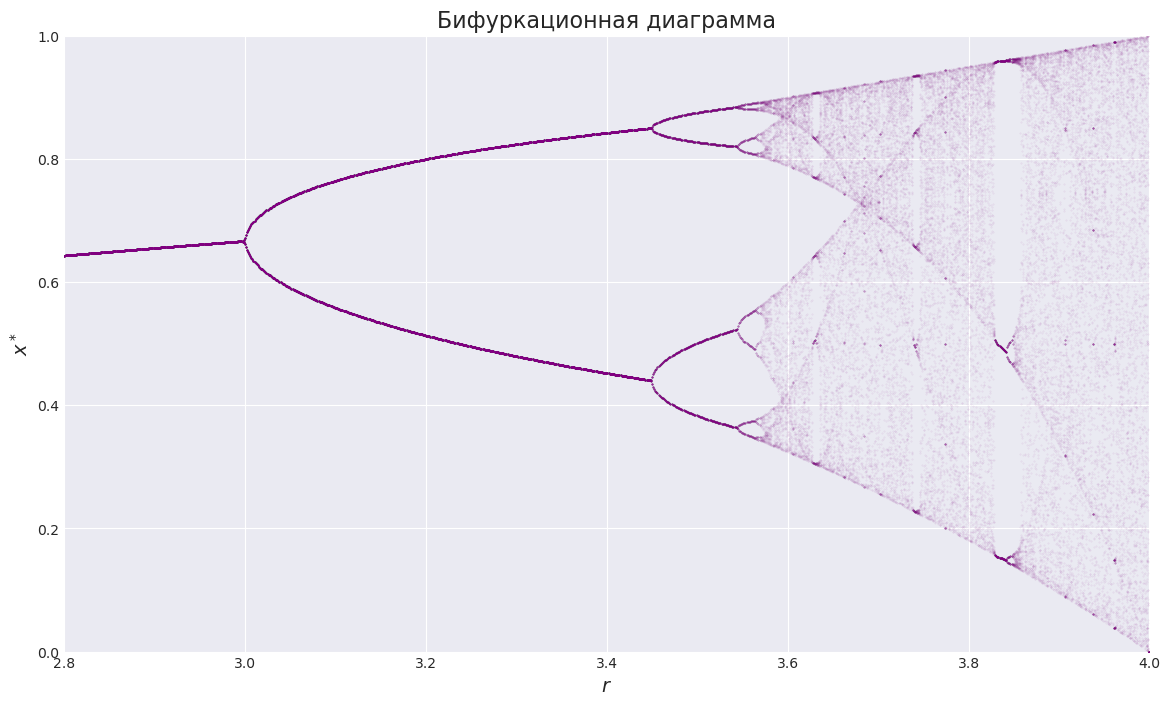

In [4]:
def plot_bifurcation(r_min, r_max, n_r=1000, n_iter=1000, n_keep=100, title="Бифуркационная диаграмма"):
    r_values = np.linspace(r_min, r_max, n_r)
    x_values = []
    r_points = []
    
    x = 0.5 * np.ones(n_r)
    
    for _ in range(n_iter):
        x = r_values * x * (1 - x)
        
    for _ in range(n_keep):
        x = r_values * x * (1 - x)
        x_values.extend(x)
        r_points.extend(r_values)
        
    plt.figure(figsize=(14, 8))
    plt.scatter(r_points, x_values, s=0.1, c='purple', alpha=0.1)
    plt.xlabel("$r$")
    plt.ylabel("$x^*$")
    plt.title(title)
    plt.xlim(r_min, r_max)
    plt.ylim(0, 1)
    plt.show()

plot_bifurcation(2.8, 4.0)


### Фрактальная структура (самоподобие)


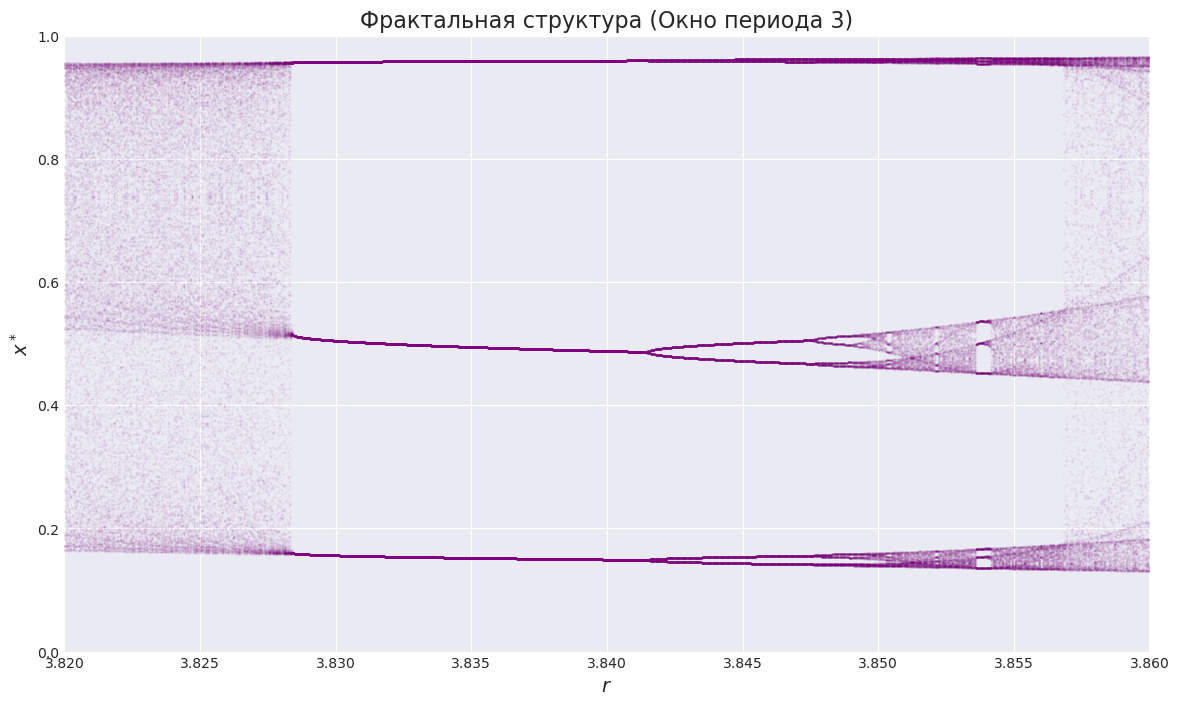

In [5]:
plot_bifurcation(3.82, 3.86, n_r=2000, title="Фрактальная структура (Окно периода 3)")


### Окна периодичности


Окно периода 3 (r ~ 3.83)


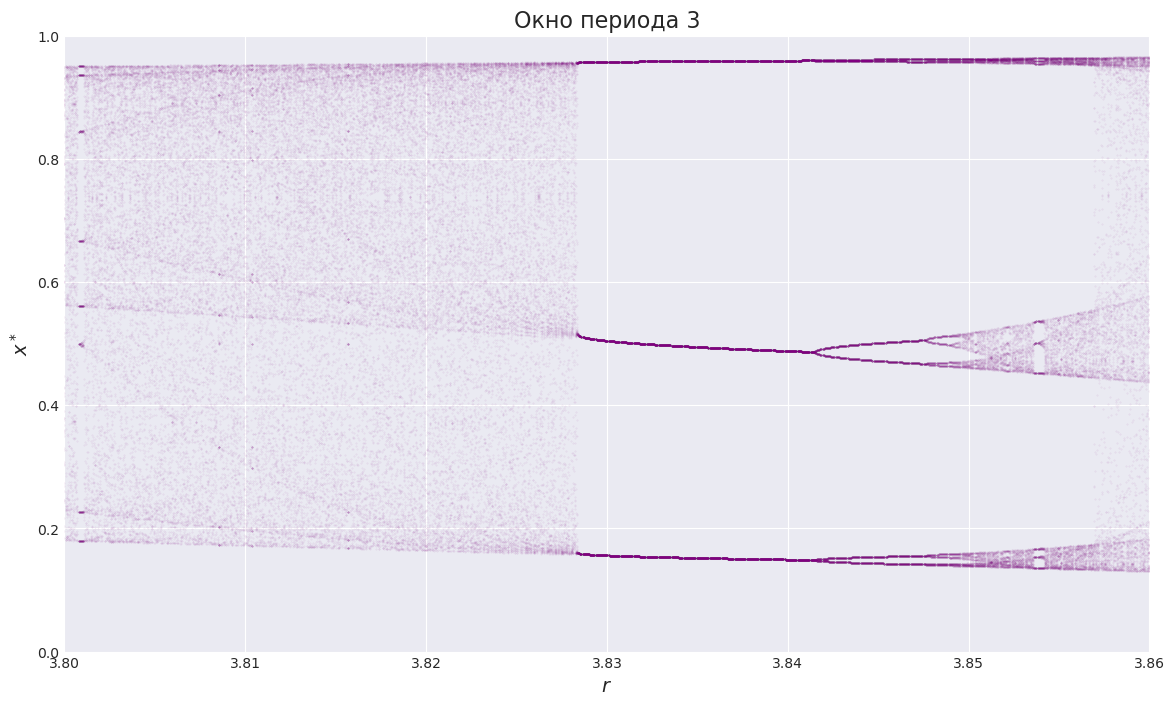

Окно периода 5 (r ~ 3.74)


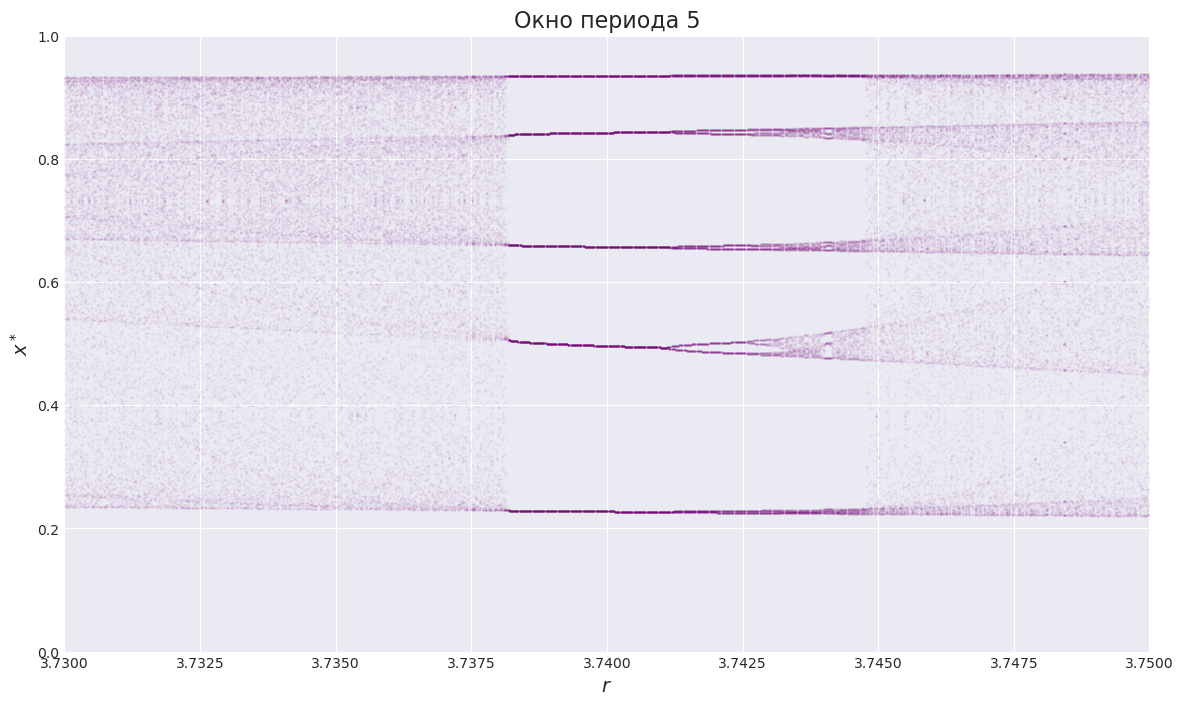

In [6]:
# Окно периода 3
print("Окно периода 3 (r ~ 3.83)")
plot_bifurcation(3.8, 3.86, n_r=1000, title="Окно периода 3")

# Окно периода 5
print("Окно периода 5 (r ~ 3.74)")
plot_bifurcation(3.73, 3.75, n_r=1000, title="Окно периода 5")


### Бонус: Порядок Шарковского и теорема

Рассмотрим следующий порядок на множестве натуральных чисел $\mathbb{N}$ (порядок Шарковского):
$$3 \triangleright 5 \triangleright 7 \triangleright \dots \triangleright 2 \cdot 3 \triangleright 2 \cdot 5 \triangleright \dots \triangleright 2^2 \cdot 3 \triangleright \dots \triangleright 2^k \triangleright \dots \triangleright 4 \triangleright 2 \triangleright 1$$
(Сначала идут нечетные числа $\ge 3$, затем нечетные, умноженные на 2, затем на $2^2$ и так далее, в конце идут степени двойки в убывающем порядке).

**Теорема Шарковского:** Если непрерывное отображение отрезка в себя $f: [a, b] \to [a, b]$ имеет цикл периода $k$, то оно имеет циклы всех периодов $m$, таких что $k \triangleright m$.

Так как число 3 является старшим (первым) элементом в этом порядке, то существование цикла периода 3 влечет за собой существование циклов **любого** другого периода ($1, 2, 4, 5, \dots$), а также хаотическое поведение. Это утверждение известно как "Period three implies chaos" (Ли и Йорк).


## 6. Исследование отображения $g(x_n)$

Рассмотрим отображение:
$$g(x) = r x (1 - x) (2 + x)$$

### Анализ устойчивости неподвижной точки $x^*=0$

**Способ 1 (Оценка по определению):**
При малых $x$, слагаемыми $x^2$ и $x^3$ можно пренебречь по сравнению с $x$.
$g(x) \approx r \cdot x \cdot 1 \cdot 2 = 2rx$.
Отображение ведет себя как линейное $x_{n+1} \approx 2r x_n$.
Для устойчивости (сжатия к нулю) необходимо $|2r| < 1$, то есть $|r| < 0.5$.

**Способ 2 (Через производную):**
$$g(x) = r(x - x^2)(2 + x) = r(2x - x^2 - x^3)$$
$$g'(x) = r(2 - 2x - 3x^2)$$
В точке $x^*=0$: $g'(0) = 2r$.
Условие устойчивости (по первому приближению, см. выше):
$|g'(0)| < 1 \implies |2r| < 1 \implies r \in (-0.5; 0.5)$.


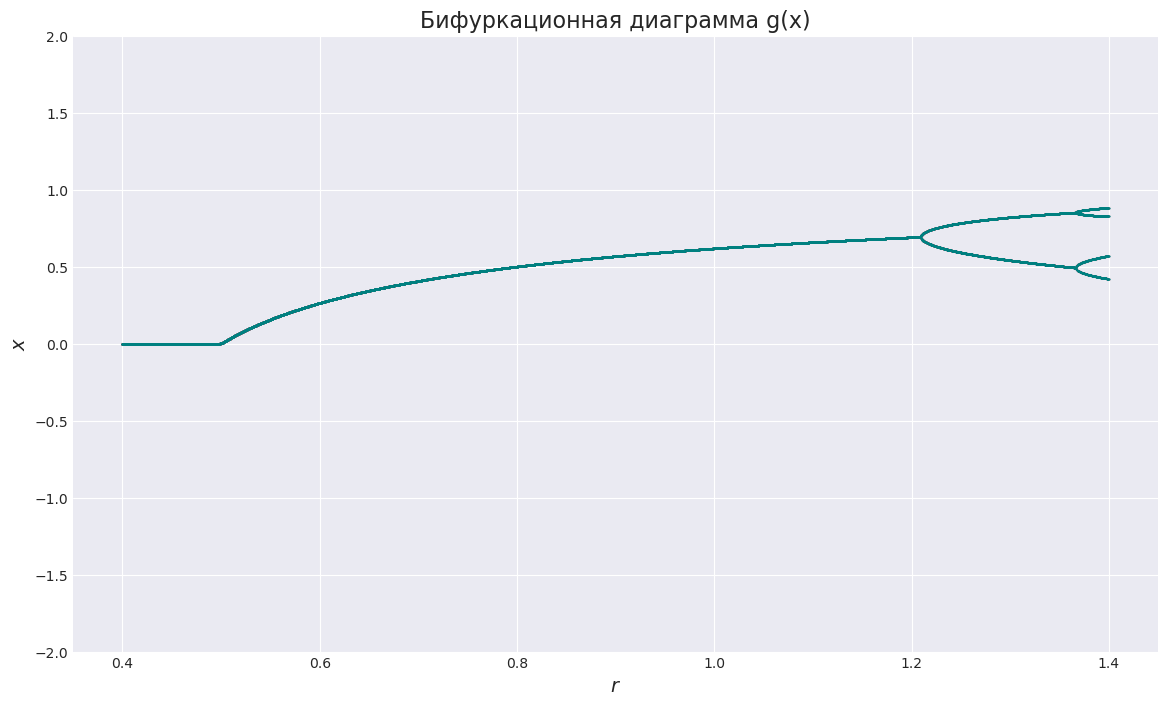

In [7]:
def g_map(r, x):
    return r * x * (1 - x) * (2 + x)

def plot_bifurcation_g(r_min, r_max, n_r=2000, n_iter=1000, n_keep=100, title="Бифуркационная диаграмма g(x)"):
    r_values = np.linspace(r_min, r_max, n_r)
    x_values = []
    r_points = []
    
    x = 0.1 * np.ones(n_r)
    
    for _ in range(n_iter):
        x = g_map(r_values, x)
        x = np.clip(x, -5, 5)
        
    for _ in range(n_keep):
        x = g_map(r_values, x)
        x_values.extend(x)
        r_points.extend(r_values)
        
    plt.figure(figsize=(14, 8))
    plt.scatter(r_points, x_values, s=0.1, c='teal', alpha=0.1)
    plt.xlabel("$r$")
    plt.ylabel("$x$")
    plt.title(title)
    plt.ylim(-2, 2)
    plt.show()

plot_bifurcation_g(0.4, 1.4)


**Сравнение с логистическим отображением:**
1.  Потеря устойчивости нуля происходит при $r=0.5$.
2.  Сценарий удвоения периода сохраняется.

### Окна периодичности g(x)


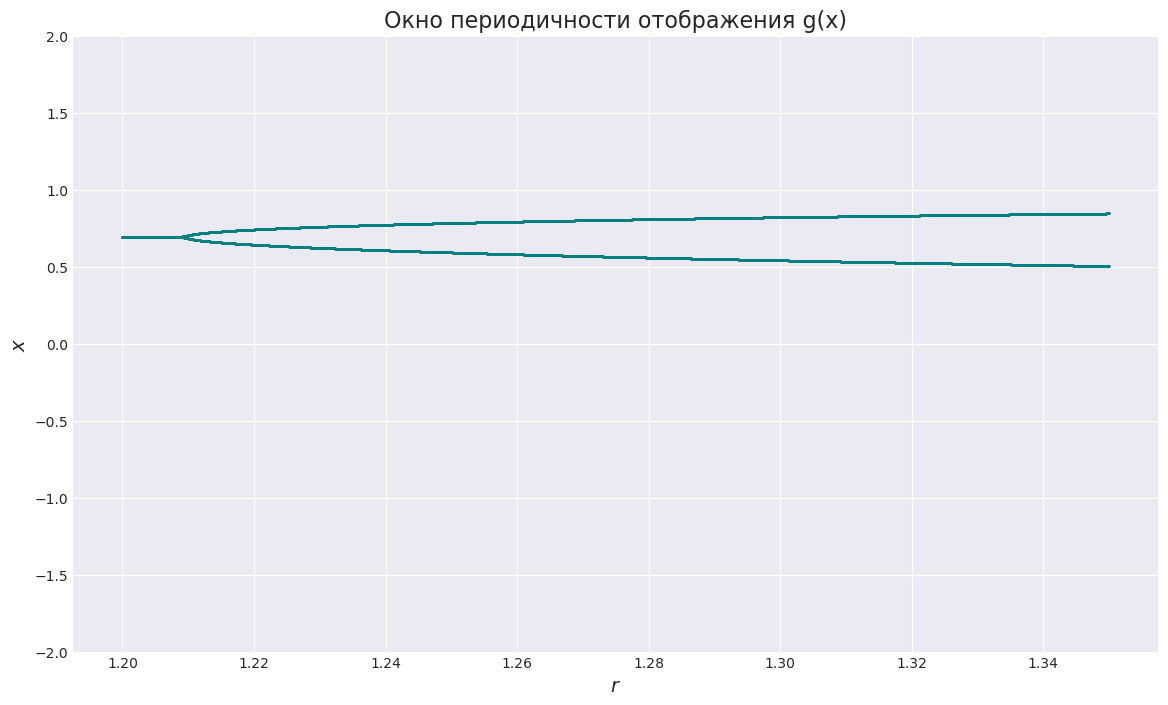

In [8]:
plot_bifurcation_g(1.2, 1.35, title="Окно периодичности отображения g(x)")
